In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
%pwd
os.chdir("../")

In [3]:
sns.set(style="whitegrid")

In [4]:
%pwd

'd:\\Runway\\Projects\\data_it_enterprises'

In [5]:
import pandas as pd


In [6]:
data=pd.read_csv("artifacts/data_ingestion/allmetrics.csv")
data.head()

,CPU_Load,Memory_Usage,Disk_Usage,Network_IO,Server_Load,Power_Consumption,Temperature,Num_of_Running_Processes,Storage_Capacity,Server_Uptime,Status,Server_ID,Server_Dependency
0,52.629190,48.885554,65.686480,42.113656,48.569130,39.249038,55.792941,51,56.160407,48.473423,59.473216,Server_1,Server_2945
1,56.634583,20.232022,35.264304,37.050711,66.371983,50.963175,38.899316,46,50.962167,58.002286,39.901573,Server_2,Server_738
2,34.024515,21.227805,56.550348,34.393895,45.425457,53.193483,29.091559,48,59.323921,50.566179,41.766745,Server_3,Server_1396
3,43.595644,42.301180,47.927740,59.211128,58.502400,31.574986,49.276095,50,55.188524,49.681689,37.464329,Server_4,Server_242
4,45.944282,58.220190,58.248009,66.926232,45.186706,50.537771,45.028851,61,71.671269,71.834936,54.728673,Server_5,Server_2681


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data['CPU_Load'], kde=True, color='blue')
plt.title('Distribution of CPU Load Across Servers')
plt.xlabel('CPU Load')
plt.ylabel('Frequency')
plt.show()

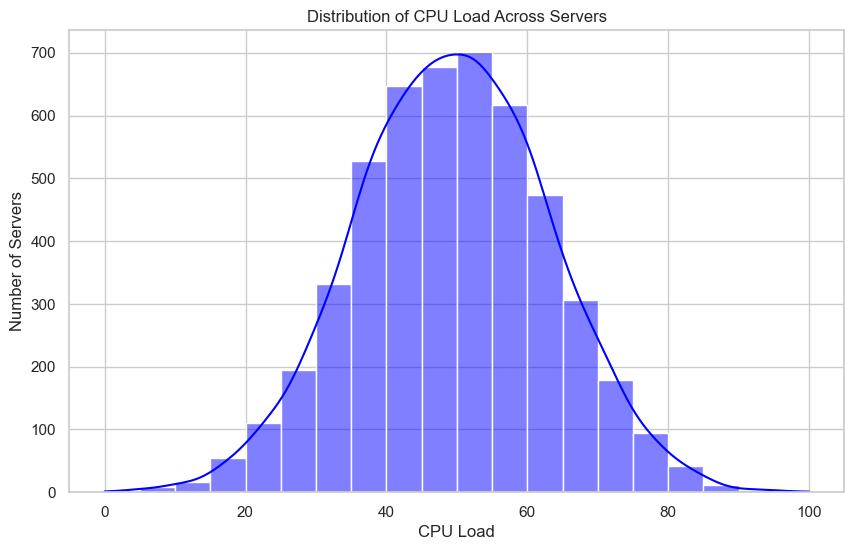

In [8]:
import matplotlib.pyplot as plt
# Plotting the distribution of CPU Load
plt.figure(figsize=(10, 6))
fig=sns.histplot(data['CPU_Load'], kde=, color='blue', bins=20)
fig.set_title('Distribution of CPU Load Across Servers')
fig.set_xlabel('CPU Load')
fig.set_ylabel('Number of Servers')
st.pyplot(fig.figure)

In [34]:
count_low_cpu_load = data[data['CPU_Load'] < 25].shape[0]
count_low_memory_usage = data[data['Memory_Usage'] < 25].shape[0]
count_low_disk_usage = data[data['Disk_Usage'] < 25].shape[0]

print("Number of servers with CPU Load less than 25:", count_low_cpu_load)
print("Number of servers with Memory Usage less than 25:", count_low_memory_usage)
print("Number of servers with Disk Usage less than 25:", count_low_disk_usage)

Number of servers with CPU Load less than 25: 190
Number of servers with Memory Usage less than 25: 387
Number of servers with Disk Usage less than 25: 266


In [36]:
count_high_cpu_load = data[data['CPU_Load'] > 85].shape[0]
count_high_memory_usage = data[data['Memory_Usage'] > 85].shape[0]
count_high_disk_usage = data[data['Disk_Usage'] > 85].shape[0]

print("Number of servers with CPU Load high than 85:", count_high_cpu_load)
print("Number of servers with Memory Usage high than 85:", count_high_memory_usage)
print("Number of servers with Disk Usage high than 85:", count_high_disk_usage)

Number of servers with CPU Load high than 85: 17
Number of servers with Memory Usage high than 85: 11
Number of servers with Disk Usage high than 85: 1


In [37]:
# Initialize counts
cpu_load_counts = {'Low (<=25)': 0, 'Normal (26-85)': 0, 'High (>85)': 0}
memory_usage_counts = {'Low (<=25)': 0, 'Normal (26-85)': 0, 'High (>85)': 0}
disk_usage_counts = {'Low (<=25)': 0, 'Normal (26-85)': 0, 'High (>85)': 0}

# Calculate counts for each category
cpu_load_counts['Low (<=25)'] = (data['CPU_Load'] <= 25).sum()
cpu_load_counts['Normal (26-85)'] = ((data['CPU_Load'] > 25) & (data['CPU_Load'] <= 85)).sum()
cpu_load_counts['High (>85)'] = (data['CPU_Load'] > 85).sum()

memory_usage_counts['Low (<=25)'] = (data['Memory_Usage'] <= 25).sum()
memory_usage_counts['Normal (26-85)'] = ((data['Memory_Usage'] > 25) & (data['Memory_Usage'] <= 85)).sum()
memory_usage_counts['High (>85)'] = (data['Memory_Usage'] > 85).sum()

disk_usage_counts['Low (<=25)'] = (data['Disk_Usage'] <= 25).sum()
disk_usage_counts['Normal (26-85)'] = ((data['Disk_Usage'] > 25) & (data['Disk_Usage'] <= 85)).sum()
disk_usage_counts['High (>85)'] = (data['Disk_Usage'] > 85).sum()

# Convert to list of lists in the order of Low, Normal, High
cpu_load_values = [cpu_load_counts['Low (<=25)'], cpu_load_counts['Normal (26-85)'], cpu_load_counts['High (>85)']]
memory_usage_values = [memory_usage_counts['Low (<=25)'], memory_usage_counts['Normal (26-85)'], memory_usage_counts['High (>85)']]
disk_usage_values = [disk_usage_counts['Low (<=25)'], disk_usage_counts['Normal (26-85)'], disk_usage_counts['High (>85)']]

# Now we plot the stacked bar chart
categories = ['CPU Load', 'Memory Usage', 'Disk Usage']
values = data([cpu_load_values, memory_usage_values, disk_usage_values])

fig, ax = plt.subplots(figsize=(10, 6))

# The bar locations on the x-axis
bar_locations = data.arange(len(categories))

# The width of the bars
bar_width = 0.5

# Colors for each section
colors = ['green', 'blue', 'red']

# Plotting each stack
for i in range(len(colors)):
    ax.bar(bar_locations, values[:, i], bar_width, bottom=data.sum(values[:, :i], axis=1), color=colors[i], label=f'{["<=25", "Normal", ">85"][i]}')

# Adding the text labels for each bar
for i in range(len(categories)):
    for j in range(len(colors)):
        height = data.sum(values[i, :j])
        ax.text(i, height + values[i, j]/2, f'{values[i, j]}', ha='center', va='center')

# Setting the position of the x ticks
ax.set_xticks(bar_locations)

# Setting the labels for the x ticks
ax.set_xticklabels(categories)

# Adding the legend
ax.legend(title='Category')

# Setting the labels for the axes
plt.xlabel('Metrics')
plt.ylabel('Number of Servers')

# Display the plot
plt.show()

TypeError: 'DataFrame' object is not callable